# Popular Keywords in S.Korean Leather Bag Market

To many outsiders, Korea is a highly collective and conservative—not necessarily limited to political terms—country that, based on such characteristics, frequently enforce uniformity to its people. This uniformity not only affects people’s behavior but also their appearance and outfit because beauty standard is also not free from being uniform. ([Odyssey](https://www.theodysseyonline.com/guess-different-women-photo))

![Uniformity](uniformity.jpg) (image from the Odyssey article)

I would like to investigate this idea in relation to a project I am involved in currently. My role is to introduce the leather bag brand that is active in America, Adees Co., to South Korea. Given this opportunity, I will try to identify the uniformity that is potentially present in leather bag products while providing information relevant to Adees Co.’s product advertisement and description through this project. 

3 Websites analyzed: 
1. Mutemuse
2. Mad Goat
3. Avam

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
stop = stopwords.words("english")

from string import punctuation

import pandas as pd

import numpy as np
from numpy import ndarray

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#!pip install spacy
#!python -m spacy download en_core_web_lg
import spacy

import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s2park2018/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Brand Theme Identification (About Us Page Analysis)
Brands make explicit their theme or identity usually in their 'About Us' page. By analyzing the text they provide on the page, I will identify keywords that are used to create each company's brand image. 


### MuteMuse: About Us
![Mutemuse](mutemuse.png)

In [2]:
# Importing Text
MM_about = """Mutemuse captures inspiration from the corners of everyday life. 
It melts quietly everywhere, yet keeps attracting attention. 
Mutemuse imagines another inspiration that the object can give you."""

nlp = spacy.load("en_core_web_lg")

# Lemmatizing
def lemmatize(MM_about): 
    words = ' '.join(MM_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MM_lemma = lemmatize(MM_about.split())

# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    MM_about = MM_about.replace(char, "")
MM_lemma = lemmatize(MM_about.lower().split())
print(MM_lemma)
print()

# Analyzing words
nlp = spacy.load("en_core_web_lg")
doc = nlp(" ".join(MM_lemma))

d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MM_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(MM_out.head())
print()

# Removing Stopwords
MM_stop = list(np.where(MM_out["is_stop"] == False)[0])
MM_out = MM_out.iloc[MM_stop]

# Subset Adjectives
MM_adj = MM_out[MM_out["pos"] == "ADJ"]
print(MM_adj.head())
print()

# Count Frequency
MM_freq1 = MM_adj["lemma"].value_counts()
print(MM_freq1)
print()

# Transforming Series into Dictionary
MM_ABOUT = {k:v for k, v in MM_freq1.iteritems()}
print(MM_ABOUT)

['mutemuse', 'capture', 'inspiration', 'from', 'the', 'corner', 'of', 'everyday', 'life', '-PRON-', 'melt', 'quietly', 'everywhere', 'yet', 'keep', 'attract', 'attention', 'mutemuse', 'imagine', 'another', 'inspiration', 'that', 'the', 'object', 'can', 'give', '-PRON-']

          text        lemma   pos tag    dep shape  is_alpha  is_stop
0     mutemuse     mutemuse  NOUN  NN  nsubj  xxxx      True    False
1      capture      capture  NOUN  NN   ROOT  xxxx      True    False
2  inspiration  inspiration  NOUN  NN   dobj  xxxx      True    False
3         from         from   ADP  IN   prep  xxxx      True     True
4          the          the   DET  DT    det   xxx      True     True

       text     lemma  pos tag   dep shape  is_alpha  is_stop
7  everyday  everyday  ADJ  JJ  amod  xxxx      True    False

everyday    1
Name: lemma, dtype: int64

{'everyday': 1}


In [3]:
# Creating a Dataframe with the Result
MM_ABOUT = pd.DataFrame.from_dict({'everyday': 1}, orient = 'index')
MM_ABOUT = MM_ABOUT.reset_index()
MM_ABOUT = MM_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
MM_ABOUT.head()

,Keywords,Frequency
0,everyday,1


#### Analysis
The only adjective used in the about us page was 'everyday.' Word 'everyday' has synonyms such as: average, common, normal, and ordinary. From the keyword, it can be noticed that the brand aims to create leather bags that do not largely deviate from the societal norm — be it design or purpose. 

### Mad Goat: About Us
![Mad Goat](madgoat.png)

In [4]:
# Importing Text
MG_about = """Cashmere and goat skin are loved by many due to their premium material. 
However, there are many products that are created with inappropriate raw material and are not reasonable. 
MADGOAT's goal is to be brand that establishes the standard on the quality of cachmere and goat skin. 
To do so, MADGOAT carefully selects the finest material and uses optimal leather and thread to produce the best goods. 
Restrained Gloamour. MADGOAT creates daily items with restrained glamour that could be your statement piece. Premium Gift. 
MADGOAT can deliver its own unique warmth and softness to beloved ones. Appropriate Raw Material. MADGOAT carefully selects 
distinctively beautiful colors and only uses self-dyed threads and leather."""

nlp = spacy.load("en_core_web_lg")

# Lemmatizing
def lemmatize(MG_about): 
    words = ' '.join(MG_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MG_lemma = lemmatize(MG_about.split())

# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    MG_about = MG_about.replace(char, "")
MG_lemma = lemmatize(MG_about.lower().split())
print(MG_lemma)
print()

#Analyzing Words
doc = nlp(" ".join(MG_lemma))

d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MG_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(MG_out.head())
print()

# Removing Stopwords
MG_stop = list(np.where(MG_out["is_stop"] == False)[0])
MG_out = MG_out.iloc[MG_stop]

# Subsetting Adjectives
MG_adj = MG_out[MG_out["pos"] == "ADJ"]
print(MG_adj.head())
print()

# Counting Frequency
MG_freq1 = MG_adj["lemma"].value_counts()
print(MG_freq1)
print()

# Transforming Series into Dictionary 
MG_ABOUT = {k:v for k, v in MG_freq1.iteritems()}
print(MG_ABOUT)

['cashmere', 'and', 'goat', 'skin', 'be', 'love', 'by', 'many', 'due', 'to', '-PRON-', 'premium', 'material', 'however', 'there', 'be', 'many', 'product', 'that', 'be', 'create', 'with', 'inappropriate', 'raw', 'material', 'and', 'be', 'not', 'reasonable', 'madgoat', 'goal', 'be', 'to', 'be', 'brand', 'that', 'establish', 'the', 'standard', 'on', 'the', 'quality', 'of', 'cachmere', 'and', 'goat', 'skin', 'to', 'do', 'so', 'madgoat', 'carefully', 'select', 'the', 'fine', 'material', 'and', 'use', 'optimal', 'leather', 'and', 'thread', 'to', 'produce', 'the', 'good', 'good', 'restrain', 'gloamour', 'madgoat', 'create', 'daily', 'item', 'with', 'restrained', 'glamour', 'that', 'could', 'be', '-PRON-', 'statement', 'piece', 'premium', 'gift', 'madgoat', 'can', 'deliver', '-PRON-', 'own', 'unique', 'warmth', 'and', 'softness', 'to', 'beloved', 'one', 'appropriate', 'raw', 'material', 'madgoat', 'carefully', 'select', 'distinctively', 'beautiful', 'color', 'and', 'only', 'use', 'selfdyed', '

In [5]:
# Creating  Dataframe With the Result
MG_ABOUT = pd.DataFrame.from_dict({'good': 2, 'raw': 2, 'optimal': 1, 'unique': 1, 'beautiful': 1, 'beloved': 1, 'restrained': 1, 'daily': 1, 'appropriate': 1, 'selfdyed': 1, 'fine': 1, 'create': 1, 'inappropriate': 1, 'reasonable': 1}, orient = 'index')
MG_ABOUT = MG_ABOUT.reset_index()
MG_ABOUT = MG_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
MG_ABOUT

,Keywords,Frequency
0,good,2
1,raw,2
2,optimal,1
3,unique,1
4,beautiful,1
5,beloved,1
6,restrained,1
7,daily,1
8,appropriate,1
9,selfdyed,1


#### Analysis
Adjectives used in Mad Goat contain adjectives that function to emphasize the material they use, such as 'raw,' 'fine,' and 'selfdyed.' Such keywords associated with other keywords such as 'good,' 'beautiful,' and 'daily,' it can be noticed that Mad Goat aims to deliver quality bags that are easily available for daily use. 

### Avam: About Us
![Avam](avam.png)

In [6]:
# Importing Text
AV_about = """AVAM, AVAM APPARTEMENT is a fashion and lifestyle brand for women who enjoy morning and night, daily life and break away, common sense and imagination. 
AVAM, AVAM APPARTEMENT is directed by the stylist, Kyoung-won Choi, make the style motto of the imaginary girl’s morning to night, or the morning and night style. 
it is divided into the subjective and liberal fashion label ‘AVAM,’ and the living & lifestyle brand ‘AVAM APPARTMENT’ that is not bound by formalities. 
The fashion label ‘AVAM’, which has a motive in the sensual daylife style of style icon that live in contemporary suggests a style of subjective and liberal women. 
It presents garments and clothing goods of sensible day look and freewheeling night look that pursue practical design, good material, and simple silhouette. 
The AVAM APPARTMENT, which offers living - lifestyle, is inspired by the lifestyle of creators such as stylists, florists, and makeup artists. 
It suggests a variety of items in daily life that can be digested easily and sensibly by reinterpreting sense and styling sensation in the lives of the creators who live a busy and active life."""

nlp = spacy.load("en_core_web_lg")

# Lemmatizing
def lemmatize(AV_about): 
    words = ' '.join(AV_about)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
AV_lemma = lemmatize(AV_about.split())

# Removing Punctuation & Making all Lowercase
for char in punctuation: 
    AV_about = AV_about.replace(char, "")
    AV_about = AV_about.replace("‘", "")
    AV_about = AV_about.replace("’", "")
AV_lemma = lemmatize(AV_about.lower().split())
print(AV_lemma)
print()

# Analyzing Words
doc = nlp(" ".join(AV_lemma))

d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

AV_out = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(AV_out.head())
print()

# Removing Stopwords
AV_stop = list(np.where(AV_out["is_stop"] == False)[0])
AV_out = AV_out.iloc[AV_stop]

# Subset Adjectives
AV_adj = AV_out[AV_out["pos"] == "ADJ"]
print(AV_adj.head())
print()

# Counting Frequency
AV_freq1 = AV_adj["lemma"].value_counts()
print(AV_freq1)
print()

# Transforming to Dictionary and Removing Translation Error
AV_ABOUT = {k:v for k, v in AV_freq1.iteritems()}
try: 
    del AV_ABOUT["avam"]
except KeyError: 
    print("key item not found")
    
print(AV_ABOUT)

['avam', 'avam', 'appartement', 'be', 'a', 'fashion', 'and', 'lifestyle', 'brand', 'for', 'woman', 'who', 'enjoy', 'morning', 'and', 'night', 'daily', 'life', 'and', 'break', 'away', 'common', 'sense', 'and', 'imagination', 'avam', 'avam', 'appartement', 'be', 'direct', 'by', 'the', 'stylist', 'kyoungwon', 'choi', 'make', 'the', 'style', 'motto', 'of', 'the', 'imaginary', 'girl', 'morning', 'to', 'night', 'or', 'the', 'morning', 'and', 'night', 'style', '-PRON-', 'be', 'divide', 'into', 'the', 'subjective', 'and', 'liberal', 'fashion', 'label', 'avam', 'and', 'the', 'live', 'lifestyle', 'brand', 'avam', 'appartment', 'that', 'be', 'not', 'bind', 'by', 'formality', 'the', 'fashion', 'label', 'avam', 'which', 'have', 'a', 'motive', 'in', 'the', 'sensual', 'daylife', 'style', 'of', 'style', 'icon', 'that', 'live', 'in', 'contemporary', 'suggest', 'a', 'style', 'of', 'subjective', 'and', 'liberal', 'woman', '-PRON-', 'present', 'garment', 'and', 'clothing', 'good', 'of', 'sensible', 'day',

In [7]:
# Using Results to Create Dataframe
AV_ABOUT = pd.DataFrame.from_dict({'daily': 2, 'liberal': 2, 'subjective': 2, 'freewheeling': 1, 'present': 1, 'sensual': 1, 'practical': 1, 'imaginary': 1, 'direct': 1, 'daylife': 1, 'sensible': 1, 'contemporary': 1, 'active': 1, 'good': 1, 'live': 1, 'common': 1, 'busy': 1, 'simple': 1}, orient = 'index')
AV_ABOUT = AV_ABOUT.reset_index()
AV_ABOUT = AV_ABOUT.rename(columns={"index":"Keywords", 0:"Frequency"})
AV_ABOUT

,Keywords,Frequency
0,daily,2
1,liberal,2
2,subjective,2
3,freewheeling,1
4,present,1
5,sensual,1
6,practical,1
7,imaginary,1
8,direct,1
9,daylife,1


#### Analysis
Many of Avam's adjectives were related to functionality as words such as 'liberal,' 'active,' 'simple,' 'busy,' 'daily,' and 'freewheeling' were found. From such keywords, it can be assumed that Avam aims to advertise the functionality of the bags that can grant a sense of freedom to the users. 

### Comparison


In [8]:
# Combining all into one dataframe for analysis
ABOUT_frames = [MM_ABOUT, MG_ABOUT, AV_ABOUT]
ABOUT = pd.concat(ABOUT_frames)

# Counting Frequencies - searching for overlapping Keywords
ABOUT_key = ABOUT["Keywords"].value_counts()

# Transforming Frequency Count into Dictionary 
ABOUT_key = {k:v for k, v in ABOUT_key.iteritems()}
print(ABOUT_key)

{'daily': 2, 'good': 2, 'beautiful': 1, 'direct': 1, 'unique': 1, 'freewheeling': 1, 'sensual': 1, 'contemporary': 1, 'fine': 1, 'everyday': 1, 'appropriate': 1, 'busy': 1, 'beloved': 1, 'optimal': 1, 'selfdyed': 1, 'create': 1, 'subjective': 1, 'raw': 1, 'present': 1, 'active': 1, 'inappropriate': 1, 'imaginary': 1, 'common': 1, 'daylife': 1, 'simple': 1, 'sensible': 1, 'live': 1, 'practical': 1, 'reasonable': 1, 'liberal': 1, 'restrained': 1}


In [9]:
# Visualizing into a Dataframe
ABOUT_Key = pd.DataFrame.from_dict({'daily': 2, 'good': 2, 'fine': 1, 'create': 1, 'sensual': 1, 'sensible': 1, 'simple': 1, 'imaginary': 1, 'common': 1, 'daylife': 1, 'appropriate': 1, 'freewheeling': 1, 'beautiful': 1, 'direct': 1, 'restrained': 1, 'active': 1, 'practical': 1, 'unique': 1, 'optimal': 1, 'everyday': 1, 'selfdyed': 1, 'raw': 1, 'liberal': 1, 'contemporary': 1, 'live': 1, 'inappropriate': 1, 'beloved': 1, 'busy': 1, 'subjective': 1, 'reasonable': 1, 'present': 1}, orient = 'index')
ABOUT_Key = ABOUT_Key.reset_index()
ABOUT_Key = ABOUT_Key.rename(columns={"index":"Keywords", 0:"Frequency"})
ABOUT_Key.head()

,Keywords,Frequency
0,daily,2
1,good,2
2,fine,1
3,create,1
4,sensual,1


Despite the variation in brand themes, words that hint on ordinary use of bags were commmonly included in all three brands' about us page. 'Everyday' served such purpose for Mutemuse while 'daily' was used in both Mad Goat and Avam's about us pages. 

## Social Media Advertisement
By analyzing the keywords used in each brand's social media advertisement, I will seek for potential presence of uniformity. If the brands reflect uniformity, more shared keywords will be found among the brands than unique / independent keywords.

I used Facebook or Instagram for advertisement information (because some sites only use one of the two) and only collected leather bag related posts April ~Present

### Mutemuse Facebook Advertisement
![MM facebook](MM_fb.png)

In [10]:
#Importing Data
MM_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Mutemuse.csv", sep = ",")
MM_file.head(2)

,Date,Original Content,Translation
0,4/15/2019,하나만 고르기 어려운 12가지 매력적인 컬러 <아뮤즈백>\n신규 컬렉션 'EDEN'...,12 attractive colors that are hard to choose f...
1,4/15/2019,은근하게 눈길을 끄는 감각적인 컬러 <아뮤즈백>\nEDEN; Eve and Haww...,a subtle eye-catching color <Amuseback>\nEDEN;...


In [11]:
# Create Function to Remove Numbers
def remove_digits(string): 
    return ''.join([ch for ch in string if not ch.isdigit()])

# Extracting Necesary Column and Removing Digits
MM_file = MM_file[MM_file["Translation"].notnull()]
MM_file = MM_file["Translation"].apply(remove_digits)
print(MM_file.head(2))
print()

# Collecting plain text for processing
MM_text = ' '.join(MM_file)

# Repeating Text Analysis
nlp = spacy.load("en_core_web_lg")

# Lemmatizing
def lemmatize(MM_text): 
    words = ' '.join(MM_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MM_ad = lemmatize(MM_text.split())

# Removing Punctuation
for char in punctuation: 
    MM_text = MM_text.replace(char, "")
    MM_text = MM_text.replace('”', "")
    MM_text = MM_text.replace('“',"")
MM_ad = lemmatize(MM_text.lower().split())

# Analyzing Words
doc = nlp(" ".join(MM_ad))

d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MM_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(MM_adout.head(2))
print()

# removing Stopwords
MM_adstop = list(np.where(MM_adout["is_stop"] == False)[0])
MM_adout = MM_adout.iloc[MM_adstop]

# Extracting Adjectives
MM_adadj = MM_adout[MM_adout["pos"] == "ADJ"]
print(MM_adadj.head(2))
print()

# Counting Frequency
MM_adadj = MM_adadj["lemma"].value_counts()
print(MM_adadj)
print()

# Transforming to Dictionary and Removing Translation Error
MM_AD = {k:v for k, v in MM_adadj.iteritems()}
try: 
    del MM_AD["mutemuse"]
except KeyError: 
    print("key item not found")
    
print(MM_AD)

0     attractive colors that are hard to choose fro...
1    a subtle eye-catching color <Amuseback>\nEDEN;...
Name: Translation, dtype: object

         text       lemma   pos tag   dep shape  is_alpha  is_stop
0  attractive  attractive   ADJ  JJ  amod  xxxx      True    False
1       color       color  NOUN  NN  ROOT  xxxx      True    False

         text       lemma  pos tag    dep shape  is_alpha  is_stop
0  attractive  attractive  ADJ  JJ   amod  xxxx      True    False
4        hard        hard  ADJ  JJ  acomp  xxxx      True    False

new            5
primitive      2
ultimate       1
hebrew         1
quaint         1
diverse        1
natural        1
unrealistic    1
hard           1
identical      1
saturated      1
dreamy         1
surreal        1
silent         1
subtle         1
eyecatching    1
strange        1
attractive     1
mutemuse       1
meet           1
Name: lemma, dtype: int64

{'new': 5, 'primitive': 2, 'ultimate': 1, 'hebrew': 1, 'quaint': 1, 'diverse': 1, 'na

In [12]:
# Transforming into Dataframe
MM_AD = pd.DataFrame.from_dict({'new': 5, 'primitive': 2, 'ultimate': 1, 'unrealistic': 1, 'quaint': 1, 'surreal': 1, 'saturated': 1, 'silent': 1, 'subtle': 1, 'strange': 1, 'hebrew': 1, 'diverse': 1, 'hard': 1, 'dreamy': 1, 'natural': 1, 'identical': 1, 'eyecatching': 1, 'attractive': 1, 'meet': 1}, orient='index')
MM_AD = MM_AD.reset_index()
MM_AD = MM_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
MM_AD

,Keywords,Frequency
0,new,5
1,primitive,2
2,ultimate,1
3,unrealistic,1
4,quaint,1
5,surreal,1
6,saturated,1
7,silent,1
8,subtle,1
9,strange,1


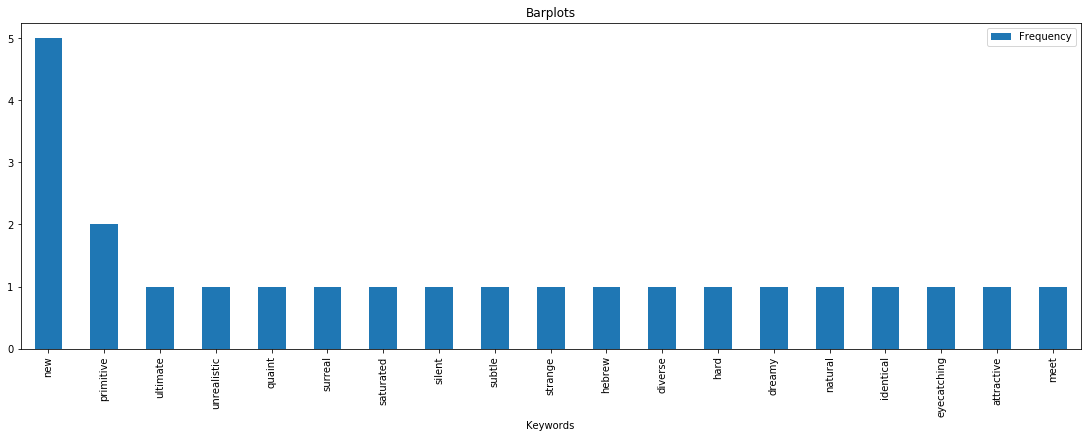

In [13]:
# Visualizing
MM_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

### Mad Goat Facebook Advertisement
![MG Facebook](MG_fb.png)

In [14]:
# Importing Data
MG_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Mad Goat.csv", sep = ",")
MG_file.head(2)

,Date,Original Content,Translation
0,6/12/2019,[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성 토...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
1,6/9/2019,\n[Dual Top Canvas Tote Bag]\n\n고트스킨&캔버스 소재 남성...,[Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...


In [15]:
# Extracting Necesary Column and Removing Digits
MG_file = MG_file[MG_file["Translation"].notnull()]
MG_file = MG_file["Translation"].apply(remove_digits)
print(MG_file.head(2))
print()

# Collecting plain text for processing
MG_text = ' '.join(MG_file)

# Removing URL
import re
MG_text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", MG_text)

# Repeating Text Analysis
nlp = spacy.load("en_core_web_lg")

# Lemmatizing
def lemmatize(MG_text): 
    words = ' '.join(MG_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
MG_ad = lemmatize(MG_text.split())

# Removing Punctuation
for char in punctuation: 
    MG_text = MG_text.replace(char, "")
    MG_text = MG_text.replace('”', "")
    MG_text = MG_text.replace('“',"")
MG_ad = lemmatize(MG_text.lower().split())

# Analyzing Words
doc = nlp(" ".join(MG_ad))

d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

MG_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(MG_adout.head(2))
print()

# removing Stopwords
MG_adstop = list(np.where(MG_adout["is_stop"] == False)[0])
MG_adout = MG_adout.iloc[MG_adstop]

# Extracting Adjectives
MG_adadj = MG_adout[MG_adout["pos"] == "ADJ"]
print(MG_adadj.head(2))
print()

# Counting Frequency
MG_adadj = MG_adadj["lemma"].value_counts()
print(MG_adadj)
print()

# Transforming to Dictionary and Removing Translation Error
MG_AD = {k:v for k, v in MG_adadj.iteritems()}
print(MG_AD)

0    [Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
1    [Dual Top Canvas Tote Bag]\n\nGoatskin & Canva...
Name: Translation, dtype: object

   text lemma  pos tag   dep shape  is_alpha  is_stop
0  dual  dual  ADJ  JJ  amod  xxxx      True    False
1   top   top  ADJ  JJ  amod   xxx      True     True

     text  lemma  pos tag   dep shape  is_alpha  is_stop
0    dual   dual  ADJ  JJ  amod  xxxx      True    False
27  black  black  ADJ  JJ  amod  xxxx      True    False

removable           25
feminine            16
womens              16
retro               16
everyday            16
light               16
red                 16
unique              16
black               10
dual                 9
ultralightweight     9
slim                 2
good                 2
mans                 2
rigid                1
male                 1
available            1
lightweighted        1
Name: lemma, dtype: int64

{'removable': 25, 'feminine': 16, 'womens': 16, 'retro': 16, 'everyday': 16, 'li

In [16]:
# Organizing Result into Dataframe
MG_AD = pd.DataFrame.from_dict({'removable': 25, 'retro': 16, 'feminine': 16, 'unique': 16, 'red': 16, 'womens': 16, 'everyday': 16, 'light': 16, 'black': 10, 'ultralightweight': 9, 'dual': 9, 'good': 2, 'slim': 2, 'mans': 2, 'male': 1, 'lightweighted': 1, 'available': 1, 'rigid': 1}, orient='index')
MG_AD = MG_AD.reset_index()
MG_AD = MG_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
MG_AD

,Keywords,Frequency
0,removable,25
1,retro,16
2,feminine,16
3,unique,16
4,red,16
5,womens,16
6,everyday,16
7,light,16
8,black,10
9,ultralightweight,9


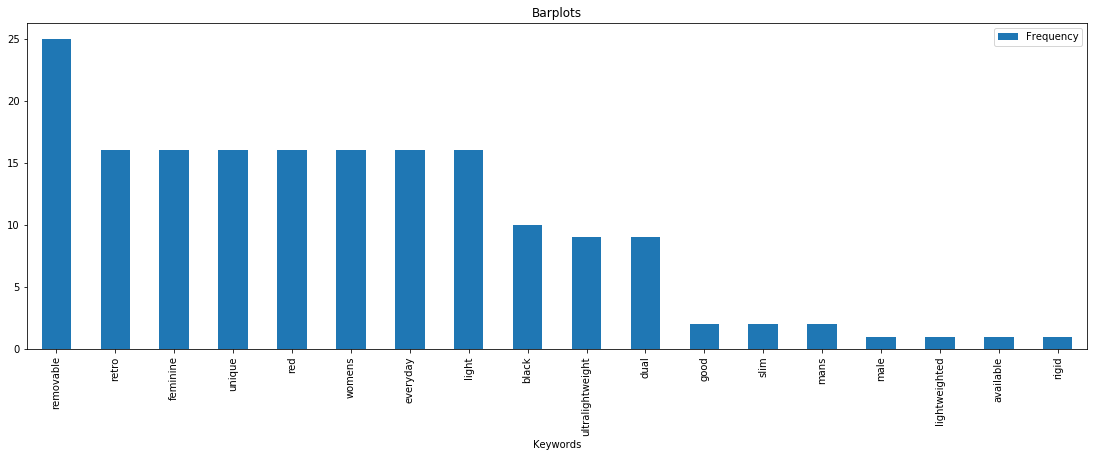

In [17]:
# Visualizing
MG_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

 ### Avam Instagram Advertisement
 ![Avam Instagram](AV_ins.png)

In [18]:
# Importing Data
AV_file = pd.read_csv("/Users/s2park2018/Desktop/DH101-Project/Leather Bag Facebook Advertisement - Avam.csv", sep = ",")
AV_file.head(2)

,Date,Original Content,Translation
0,6/16/2019,가벼운 블랙 재킷에 데님팬츠와 함께 클래식한 #캐롤린백 의 조합\n심플하고 세련되인...,A combination of classic #Carolyn bag with lig...
1,6/16/2019,모나미백은 캔버스소재와 가죽소재가 섞인 하드한 타입의 #버킷백 입니다. 편안한 스타...,Monami bag is a hard type # bucket bag that mi...


In [19]:
# Extracting Necesary Column and Removing Digits
AV_file = AV_file[AV_file["Translation"].notnull()]
AV_file = AV_file["Translation"].apply(remove_digits)
print(AV_file.head(2))
print()

# Collecting plain text for processing
AV_text = ' '.join(AV_file)

# Repeating Text Analysis

# Lemmatizing
nlp = spacy.load("en_core_web_lg")
def lemmatize(AV_text): 
    words = ' '.join(AV_text)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
AV_ad = lemmatize(AV_text.split())

# Removing Punctuation
for char in punctuation: 
    AV_text = AV_text.replace(char, "")
    AV_text = AV_text.replace('”', "")
    AV_text = AV_text.replace('“',"")
AV_ad = lemmatize(AV_text.lower().split())

# Analyzing Words
doc = nlp(" ".join(AV_ad))

d = []
d = []
for token in doc:
    d.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

AV_adout = pd.DataFrame(d, columns=("text", "lemma", "pos", "tag", "dep", "shape", 
                               "is_alpha", "is_stop"))
print(AV_adout.head(2))
print()

# Removing Stopwords
AV_adstop = list(np.where(AV_adout["is_stop"] == False)[0])
AV_adout = AV_adout.iloc[AV_adstop]

# Extracting Adjectives
AV_adadj = AV_adout[AV_adout["pos"] == "ADJ"]
print(AV_adadj.head(2))
print()

# Counting Frequency
AV_adadj = AV_adadj["lemma"].value_counts()
print(AV_adadj)
print()

# Transforming to Dictionary and Removing Translation Error
AV_AD = {k:v for k, v in AV_adadj.iteritems()}
try: 
    del AV_AD["carolynbacks"]
    del AV_AD["monamibag"]
    del AV_AD["monamie"]
    del AV_AD["abams"]
    del AV_AD["avams"]
    del AV_AD["jard"]
    del AV_AD["monami"]
except KeyError: 
    print("key item not found")
    
print(AV_AD)

0    A combination of classic #Carolyn bag with lig...
1    Monami bag is a hard type # bucket bag that mi...
Name: Translation, dtype: object

          text        lemma   pos tag   dep shape  is_alpha  is_stop
0            a            a   DET  DT   det     x      True     True
1  combination  combination  NOUN  NN  ROOT  xxxx      True    False

      text    lemma  pos tag   dep shape  is_alpha  is_stop
3  classic  classic  ADJ  JJ  amod  xxxx      True    False
7    light    light  ADJ  JJ  amod  xxxx      True    False

new             30
white           26
black           24
classic         14
double          13
daily           12
cheerful        12
casual          10
unique          10
satisfied        9
confident        9
simple           9
monamie          8
close            8
sure             7
ill              7
brown            7
bright           7
abams            7
straight         7
standard         7
powerful         7
complete         7
good             6
round      

In [20]:
# Using Results to Generate Dataframe 
## (only used words that were repeated 6 or more times)
AV_AD = pd.DataFrame.from_dict({'new': 30, 'white': 26, 'black': 24, 'classic': 14, 'double': 13, 'daily': 12, 'cheerful': 12, 'casual': 10, 'unique': 10, 'simple': 9, 'satisfied': 9, 'confident': 9, 'close': 8, 'brown': 7, 'straight': 7, 'ill': 7, 'complete': 7, 'bright': 7, 'sure': 7, 'powerful': 7, 'standard': 7, 'good': 6, 'round': 6, 'perfect': 6}, orient='index')
AV_AD = AV_AD.reset_index()
AV_AD = AV_AD.rename(columns={"index":"Keywords", 0:"Frequency"})
AV_AD

,Keywords,Frequency
0,new,30
1,white,26
2,black,24
3,classic,14
4,double,13
5,daily,12
6,cheerful,12
7,casual,10
8,unique,10
9,simple,9


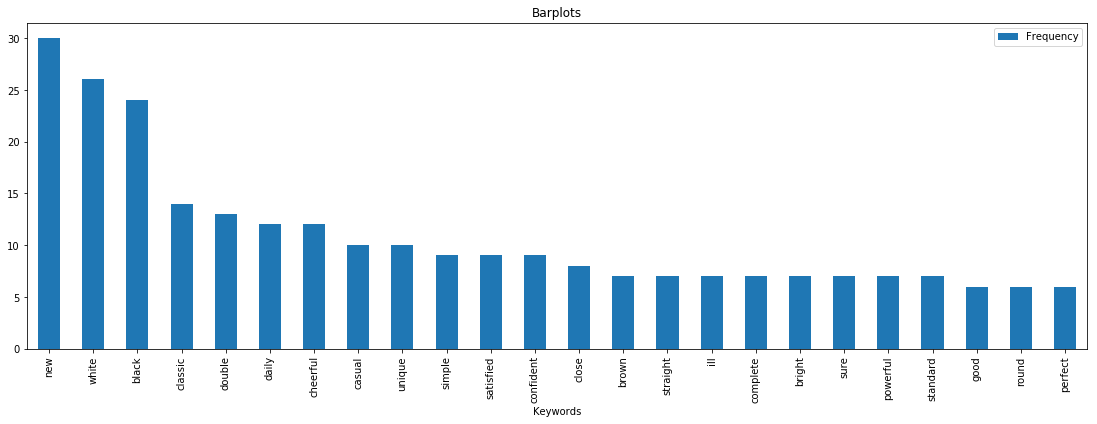

In [21]:
# Visualizing
AV_AD.plot.bar(x = "Keywords", y = "Frequency", rot = 90, title = "Barplots", figsize = (19,6));

### Comparison
#### Top Keywords
* Both 'daily' and 'everyday' are present ('everyday' from Mad Goat and 'daily' from Avam). Since they are synonyms, I will combine the two.

In [22]:
# Selecting top 15 keywords from each analysis
MM_top = MM_AD[0:15]
MG_top = MG_AD[0:15]
MG_top["Keywords"] = MG_top["Keywords"].replace({"everyday":"daily"})
AV_top = AV_AD[0:15]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
# Concatenating all keywords into one dataframe
Top_frames = [MM_top, MG_top, AV_top]
Top_keys = pd.concat(Top_frames)
print(Top_keys)
print()

# Searching for overlaps
Key_total = Top_keys["Keywords"].value_counts()
Key_total = {k:v for k, v in Key_total.iteritems()}
print(Key_total)

            Keywords  Frequency
0                new          5
1          primitive          2
2           ultimate          1
3        unrealistic          1
4             quaint          1
5            surreal          1
6          saturated          1
7             silent          1
8             subtle          1
9            strange          1
10            hebrew          1
11           diverse          1
12              hard          1
13            dreamy          1
14           natural          1
0          removable         25
1              retro         16
2           feminine         16
3             unique         16
4                red         16
5             womens         16
6              daily         16
7              light         16
8              black         10
9   ultralightweight          9
10              dual          9
11              good          2
12              slim          2
13              mans          2
14              male          1
0       

In [24]:
# Creating a Dataframe
Key_total = pd.DataFrame.from_dict({'black': 2, 'daily': 2, 'unique': 2, 'new': 2, 'satisfied': 1, 'standard': 1, 'classic': 1, 'feminine': 1, 'double': 1, 'close': 1, 'diverse': 1, 'strange': 1, 'ultimate': 1, 'primitive': 1, 'slim': 1, 'confident': 1, 'womens': 1, 'removable': 1, 'saturated': 1, 'surreal': 1, 'retro': 1, 'quaint': 1, 'unrealistic': 1, 'white': 1, 'simple': 1, 'casual': 1, 'straight': 1, 'good': 1, 'natural': 1, 'dreamy': 1, 'hard': 1, 'dual': 1, 'hebrew': 1, 'ultralightweight': 1, 'light': 1, 'subtle': 1, 'male': 1, 'silent': 1, 'red': 1, 'mans': 1, 'cheerful': 1}, orient='index')
Key_total = Key_total.reset_index()
Key_total = Key_total.rename(columns={"index":"All Keywords", 0:"Key Overlap Freq"})
Key_total

,All Keywords,Key Overlap Freq
0,black,2
1,daily,2
2,unique,2
3,new,2
4,satisfied,1
5,standard,1
6,classic,1
7,feminine,1
8,double,1
9,close,1


In [25]:
# Combining All Top Results
## Organizing keyword in alphabetical order for convenience 
Key_total = Key_total.sort_values("All Keywords")

# Manually Adding Columns
Key_total = Key_total.assign(MM_FREQ = [0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,5,2,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0])
Key_total = Key_total.assign(MG_FREQ = [10,0,0,0,0,0,16,0,0,0,9,16,2,0,0,16,1,2,0,0,0,0,16,25,16,0,0,0,0,2,0,0,0,0,0,0,9,16,0,0,16])
Key_total = Key_total.assign(AV_FREQ = [24,10,12,14,8,9,12,0,13,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,9,0,0,9,0,7,7,0,0,0,0,0,10,0,26,0])
Key_total = Key_total.assign(TOTAL_FREQ = [10,10,12,14,8,9,28,1,13,1,9,16,2,1,1,16,1,2,1,35,2,1,16,25,16,9,1,1,9,2,7,7,1,1,1,1,9,10,1,26,16])
Key_total

,All Keywords,Key Overlap Freq,MM_FREQ,MG_FREQ,AV_FREQ,TOTAL_FREQ
0,black,2,0,10,24,10
25,casual,1,0,0,10,10
40,cheerful,1,0,0,12,12
6,classic,1,0,0,14,14
9,close,1,0,0,8,8
15,confident,1,0,0,9,9
1,daily,2,0,16,12,28
10,diverse,1,1,0,0,1
8,double,1,0,0,13,13
29,dreamy,1,1,0,0,1


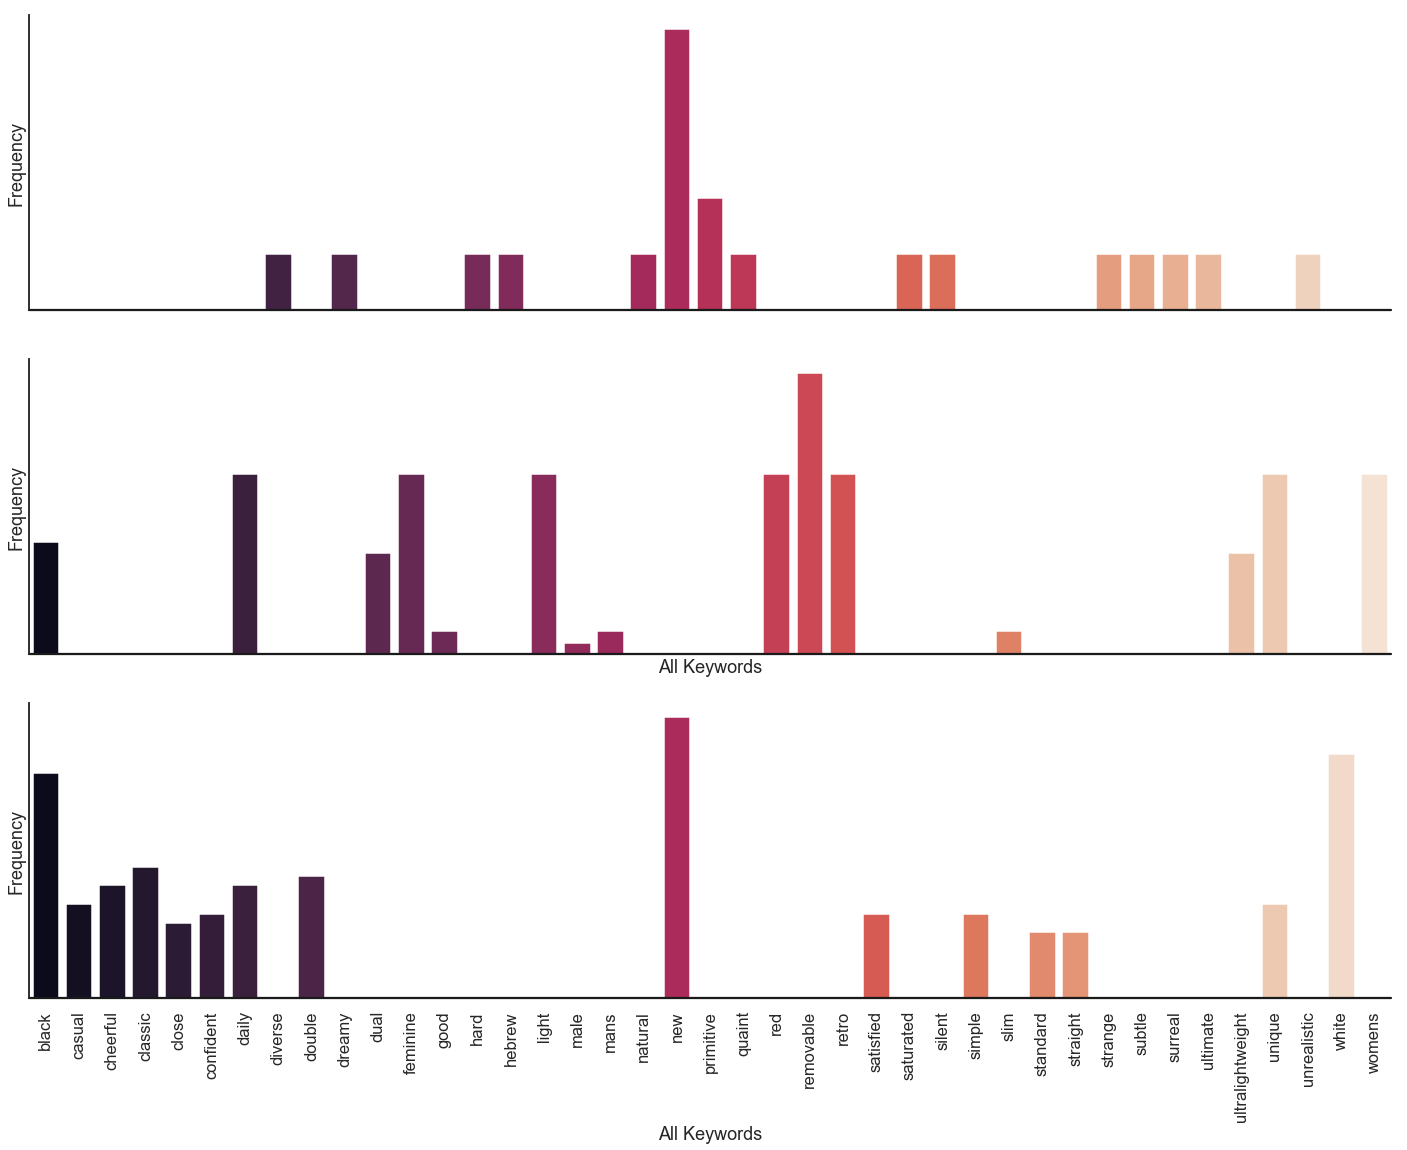

In [26]:
# Comparing Top Keywords from Each Brands
sns.set(style="white", context="talk");

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15), sharex=True);

# Mutemuse
x = Key_total ["All Keywords"]
y1 = Key_total ["MM_FREQ"]
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax1.set_ylabel("Frequency")

# MadGoat
y2 = Key_total["MG_FREQ"]
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax2.set_ylabel("Frequency")

# Avam
y3 = Key_total["AV_FREQ"]
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Frequency")

# Finalize the plot
sns.despine(bottom=True);
plt.setp(f.axes, yticks=[]);
    # potential ytick values = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
plt.tight_layout(h_pad=1);
plt.xticks(rotation=90);

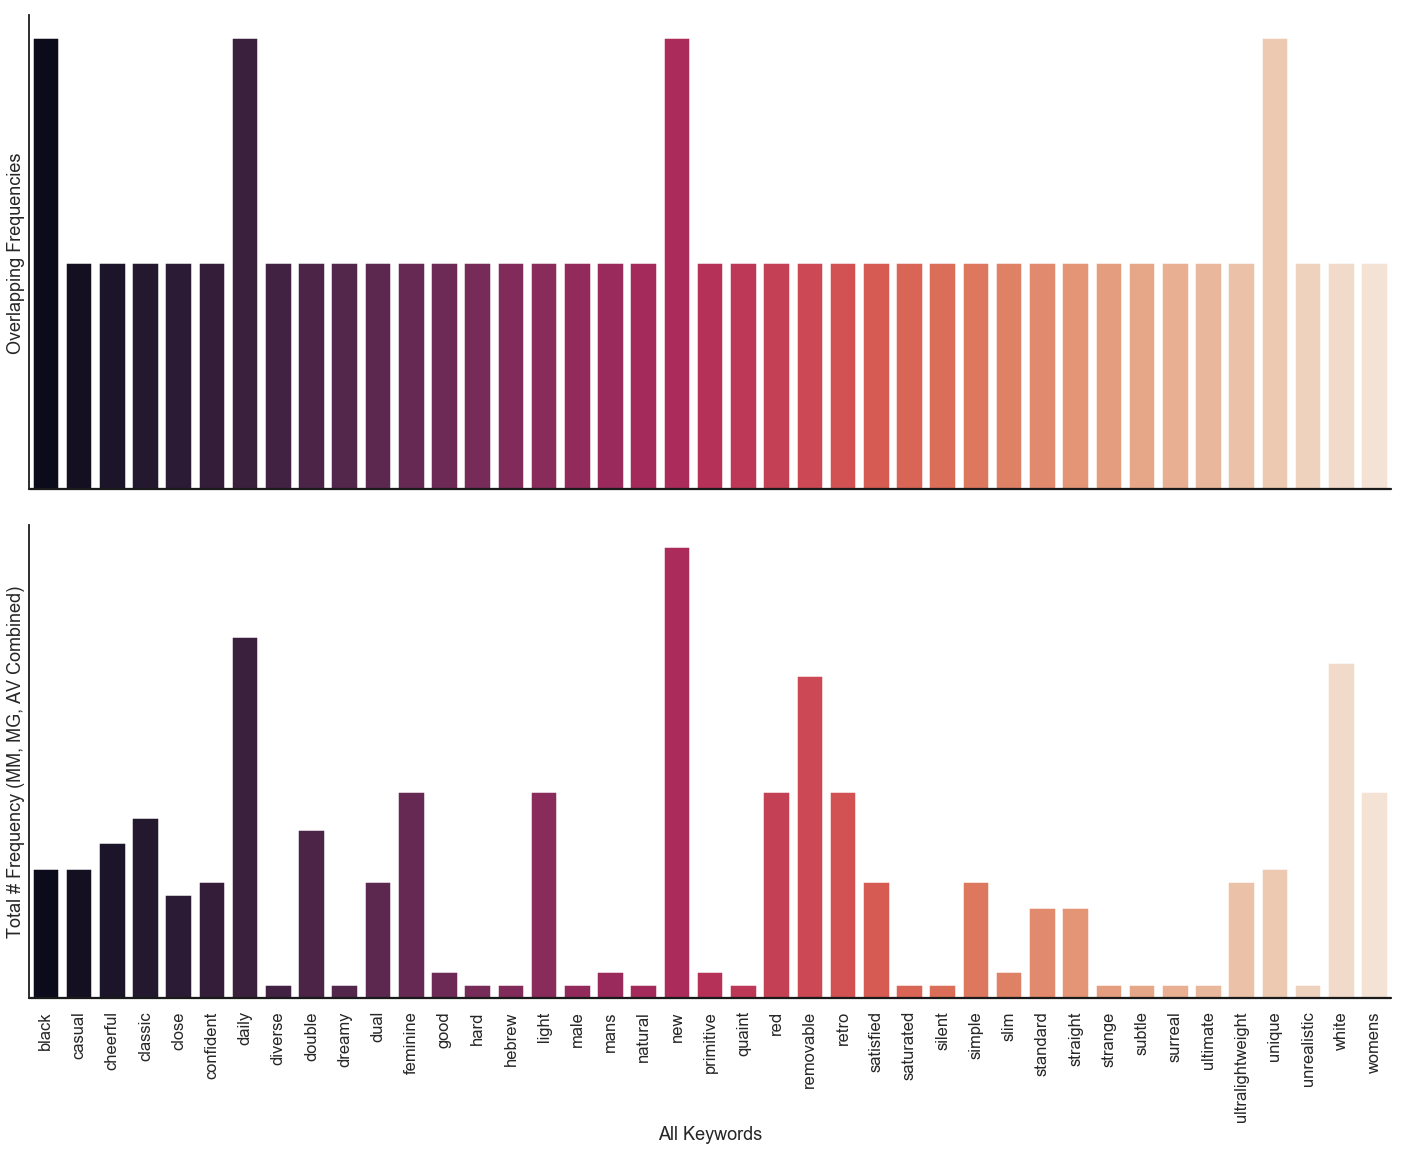

In [27]:
# Total Keyword Count

sns.set(style="white", context="talk");

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

# Mutemuse
x = Key_total ["All Keywords"]
y1 = Key_total ["Key Overlap Freq"]
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax1.set_ylabel("Overlapping Frequencies")

# MadGoat
y2 = Key_total["TOTAL_FREQ"]
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax2.set_ylabel("Total # Frequency (MM, MG, AV Combined)")

# Finalize the plot
sns.despine(bottom=True);
plt.setp(f.axes, yticks=[]);
plt.tight_layout(h_pad=1);
plt.xticks(rotation=90);

## Conclusion
### Result & its Implication
**For Adees Co.**
The keywords that were seen in more than one brand were **black**, **daily**, **new**, and **unique**. Based on the result, I can suggest Adees Co. that to advertise its product in South Korea, it should emphasize how recently the product was released (new) and thereby suggest that it reflects the recent trend, how useful it is on a daily basis (daily), and its appearance and uniqueness when compared to other products. 

Although '**unique**' may seem paradoxical to the other keyword '**daily**,' considering there are only limited kinds of variations you can make to items of daily use, each brand has to describe how using their product will allow the consumers to show off their individuality while not deviating from the societal norm. In such sense, the combination of the two keywords is important in advertisements targeting Koreans. 

**About Uniformity**
From the recurring keywords, one outstanding keyword that can potentially signify uniformity is '**daily**.' If the keyword is interpreted in a way that the product will fit into the trend and the socially acceptable form, it would indeed represent uniformity. Nevertheless, the keyword could signify how practical the bag is. For one to use a bag daily, it has to be comfortable and practical for every day use. In this case, the keyword would not necessarily reflect uniformity. I realized that from this specific project, it would be hard to draw any conclusions on whether leather bag brands in South Korea reflect uniformity or not. 

### Limitation
Although part of my goal was to seek for uniformity present in South Korean leather bags, the result of this project could not provide an adequate answer. For me to be able to identify whether keywords are uniform or not, I need several datasets from a 'not uniform' culture to compare the results to. Due to limited time and skillset, however, I was unable to scrape large amount of data from the web directly that I had to limit the number of sources I analyzed. 

### Future Path
Since my analysis and conclusion was limited due to time and skillset, given more time, I would like to analyze larger amount of advertisement information from greater number of brands from different cultures and regions. With such data, I would also be able to include more variations in visualization. For instance, once culture/region comes into play, I would be able to able to include a map that represents different kinds of keywords used in different regions. 

